<a href="https://colab.research.google.com/github/Larissabraz/AtividadesbootcampMIA/blob/main/Exercicio%208.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# imports necessários para a aula
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = (12, 7)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# importar o dataset
df = pd.read_csv("case.csv")

Vamos utilizar uma base fictícia contendo dados de visitas de clientes em um site que gostaríamos de segmentar:

Visitas: quantidade de visitas realizadas durante o mês
Tempo: tempo, em segundos, que os usuários ficaram no site

**Vamos visualizar a distribuição desses dados?**

In [6]:
df.head()

,visitas,tempo
0,3,2
1,16,18
2,7,1
3,14,11
4,3,24


In [7]:
df.describe()

,visitas,tempo
count,3000.000000,3000.000000
mean,30.221000,41.165333
std,24.852097,24.983863
min,0.000000,0.000000
25%,9.000000,19.000000
50%,19.000000,42.000000
75%,56.000000,62.000000
max,87.000000,104.000000


Vamos visualizar a distribuição desses dados?

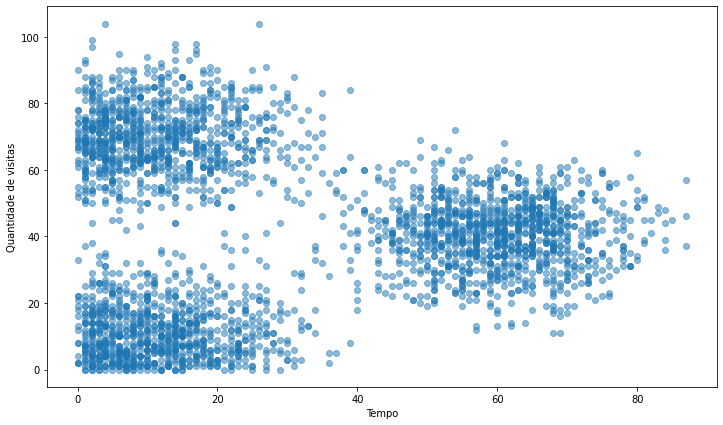

In [8]:
plt.scatter(df.visitas, df.tempo, alpha=0.5)
plt.xlabel('Tempo')
plt.ylabel('Quantidade de visitas')
plt.show()

**IMPORTANTE**

Como os agrupamentos são definidos com base em uma medida de distância, primeiro precisamos normalizar os dados!

In [9]:
# Importar o StandardScaler e normalizar os dados
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df),columns = df.columns)

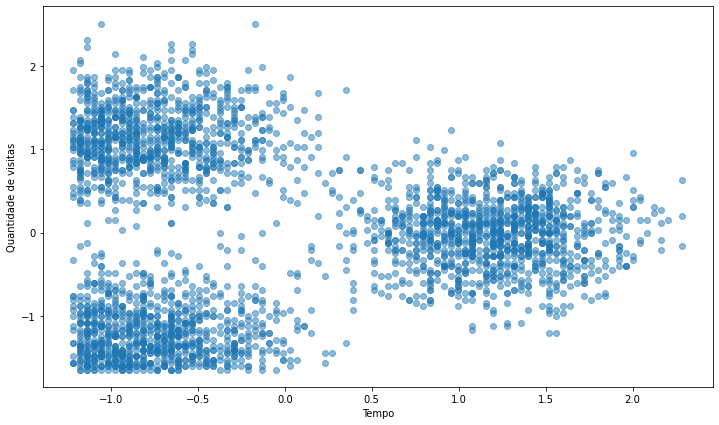

In [10]:
plt.scatter(df.visitas, df.tempo, alpha=0.5)
plt.xlabel('Tempo')
plt.ylabel('Quantidade de visitas')
plt.show()

Voltando ao K-means...

O Sklearn já conta com uma implementação do K-means. Podemos importá-la:

In [11]:
# Importar o K-means
from sklearn.cluster import KMeans

In [12]:
# cria uma instância do K-means
kmeans = KMeans(random_state=19) 
kmeans.fit(df)
# salva os centroides
centroides = kmeans.cluster_centers_
# salva as labels dos clusters para cada exemplo
y_kmeans = kmeans.predict(df)

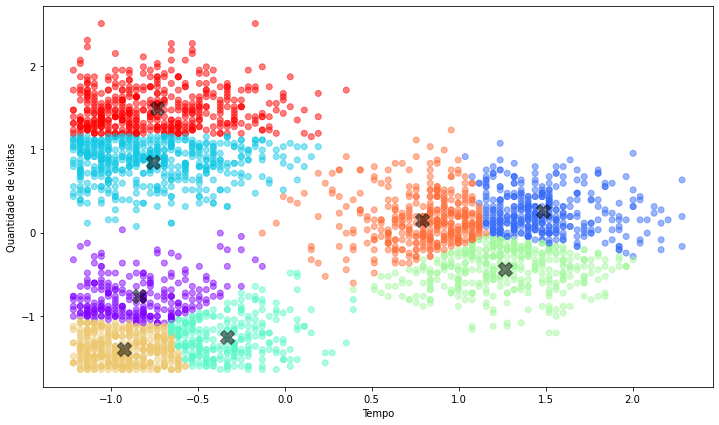

In [13]:
# plota os dados identificando seus clusters
plt.scatter(df.visitas, df.tempo, c=y_kmeans, alpha=0.5, cmap='rainbow')
plt.xlabel('Tempo')
plt.ylabel('Quantidade de visitas')
# plota os centroides também
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.show()

Acham que 8 clusters fazem sentido nesse caso? Podemos mudar o número de clusters!

IMPORTANTE²

Além de definir o número de clusters, também é importante escolher uma seed. Isso porque como os centroides iniciais são escolhidos aleatoriamente, clusters diferentes podem ser gerados pelo K-means dependendo dessa iniciação e do número de clusters.

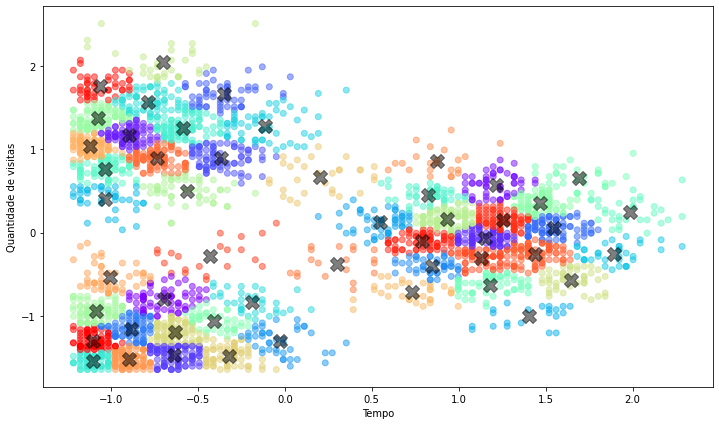

In [14]:
# Sem o seed
kmeans = KMeans(n_clusters=50) 
kmeans.fit(df)

centroides = kmeans.cluster_centers_
y_kmeans = kmeans.predict(df)

plt.scatter(df.visitas, df.tempo, c=y_kmeans, alpha=0.5, cmap='rainbow')
plt.xlabel('Tempo')
plt.ylabel('Quantidade de visitas')
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=200, alpha=0.5)

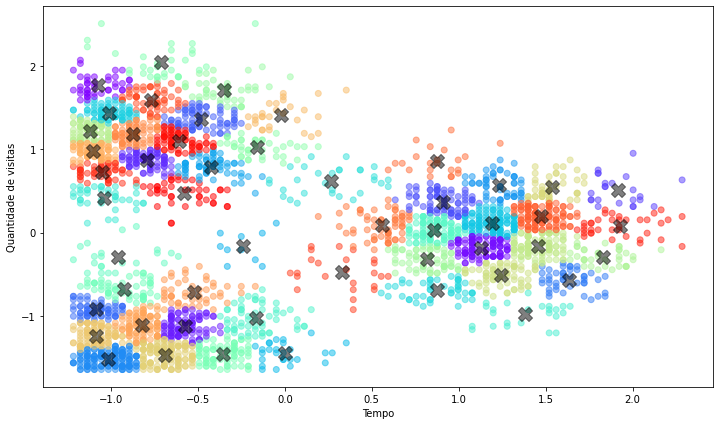

In [15]:
# Com o seed
kmeans = KMeans(n_clusters=50, random_state=8) 
kmeans.fit(df)

centroides = kmeans.cluster_centers_
y_kmeans = kmeans.predict(df)

plt.scatter(df.visitas, df.tempo, c=y_kmeans, alpha=0.5, cmap='rainbow')
plt.xlabel('Tempo')
plt.ylabel('Quantidade de visitas')
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.show()

Altere o número de clusters e rode o algoritmo de novo. Vamos ver o que acontece :D

Não se esqueça de adicionar uma seed!

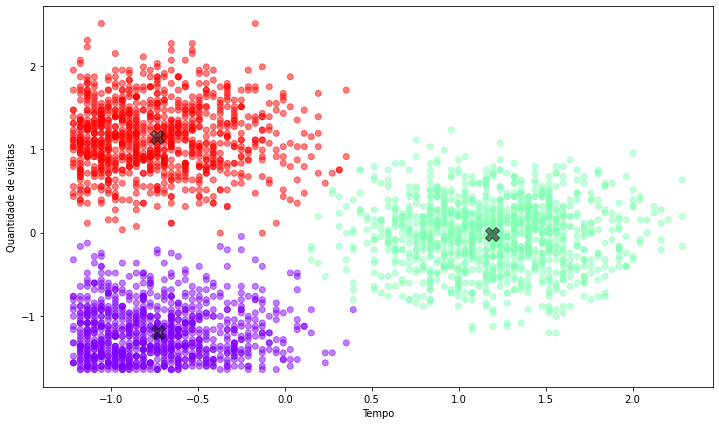

In [16]:
# TODO
kmeans = KMeans(n_clusters=3, random_state=8) 
kmeans.fit(df)

centroides = kmeans.cluster_centers_
y_kmeans = kmeans.predict(df)

plt.scatter(df.visitas, df.tempo, c=y_kmeans, alpha=0.5, cmap='rainbow')
plt.xlabel('Tempo')
plt.ylabel('Quantidade de visitas')
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.show()

Para escolhermos o número de clusters, observamos o gráfico do cotovelo com as inércias e escolhemos o ponto no qual a inércia começa a ficar mais plana e formar um "cotovelo":

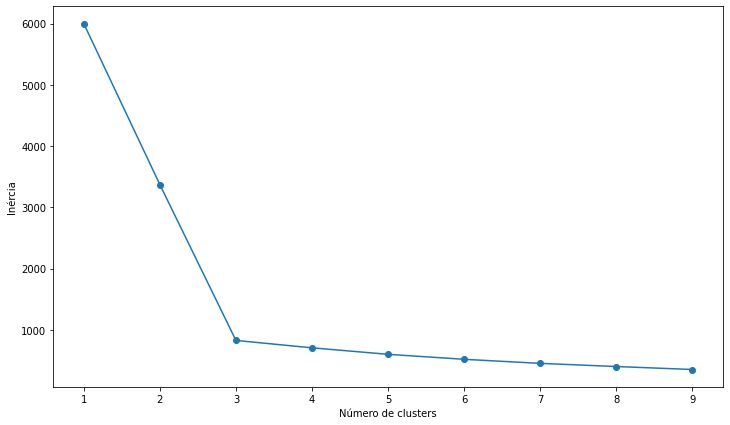

In [17]:
# Quantidade de clusters que serão testados
k = list(range(1, 10))

# Armazena das inércias para cada k
inercia = []

# Roda o K-means para cada k fornecido
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=8)
    kmeans.fit(df)
    inercia.append(kmeans.inertia_)

# Plota o gráfico com as inércias
plt.plot(k, inercia, '-o')
plt.xlabel(r'Número de clusters')
plt.ylabel('Inércia')
plt.show()

# **Exercício 2**
Agora vamos fazer mais uma segmentação de clientes com o K-Means, dessa vez com mais features. O dataset que iremos utilizar é uma adaptação deste aqui presente no Kaggle.

Dessa vez, vamos supor que estamos envolvidos em um projeto de um e-commerce que tem como objetivo segmentar e entender seus clientes para realizar campanhas de marketing.

In [19]:
# importar o dataset
segmentation = pd.read_csv("customer_segmentation.csv")
segmentation.head()

,id,tem_cartao,idade,renda,score
0,1,Não,19,1500,39
1,2,Não,21,1500,81
2,3,Sim,20,1600,6
3,4,Sim,23,1600,77
4,5,Sim,31,1700,40


In [20]:
segmentation.describe(include='all')

,id,tem_cartao,idade,renda,score
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Sim,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,6056.000000,50.200000
std,57.879185,NaN,13.969007,2626.472117,25.823522
min,1.000000,NaN,18.000000,1500.000000,1.000000
25%,50.750000,NaN,28.750000,4150.000000,34.750000
50%,100.500000,NaN,36.000000,6150.000000,50.000000
75%,150.250000,NaN,49.000000,7800.000000,73.000000


Esse conjunto de dados possui 5 campos:

id: código identificador do cliente
tem_cartao: indica se o cliente tem cartão de crédito do e-commerce ou não
idade: idade do cliente
renda: renda mensal do cliente, em reais
score: score indicando o gasto do cliente. Quanto maior, mais o cliente gasta no e-commerce
Observando os dados acima, quais pré-processamentos vocês acham que serão necessários antes de realizarmos o agrupamento?

1° - Remoção do identificador

O conjunto de dados contém o id do cliente que não iremos utilizar para a segmentação. Precisamos remover antes de realizar o agrupamento:

In [21]:
segmentation.drop(columns='id', inplace=True)

In [22]:
# importar o LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
segmentation['tem_cartao'] = label_encoder.fit_transform(segmentation.tem_cartao.values)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_segmentation = pd.DataFrame(scaler.fit_transform(segmentation),columns = segmentation.columns)

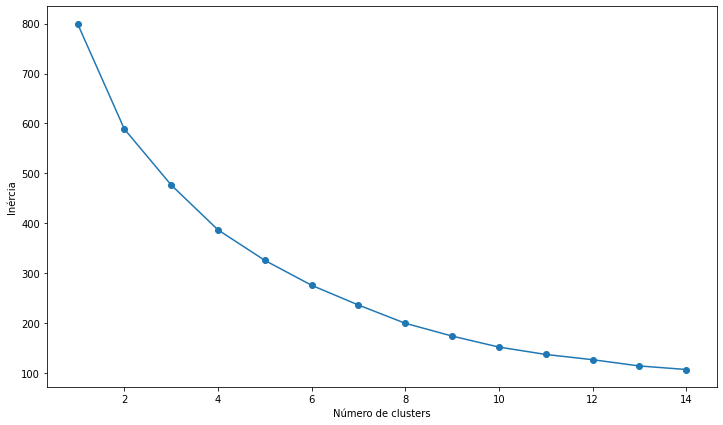

In [24]:
# Quantidade de clusters que serão testados
k = list(range(1, 15))

# Armazena das inércias para cada k
inercia = []

# Roda o K-means para cada k fornecido
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(scaled_segmentation)
    inercia.append(kmeans.inertia_)

# Plota o gráfico com as inércias
plt.plot(k, inercia, '-o')
plt.xlabel(r'Número de clusters')
plt.ylabel('Inércia')
plt.show()

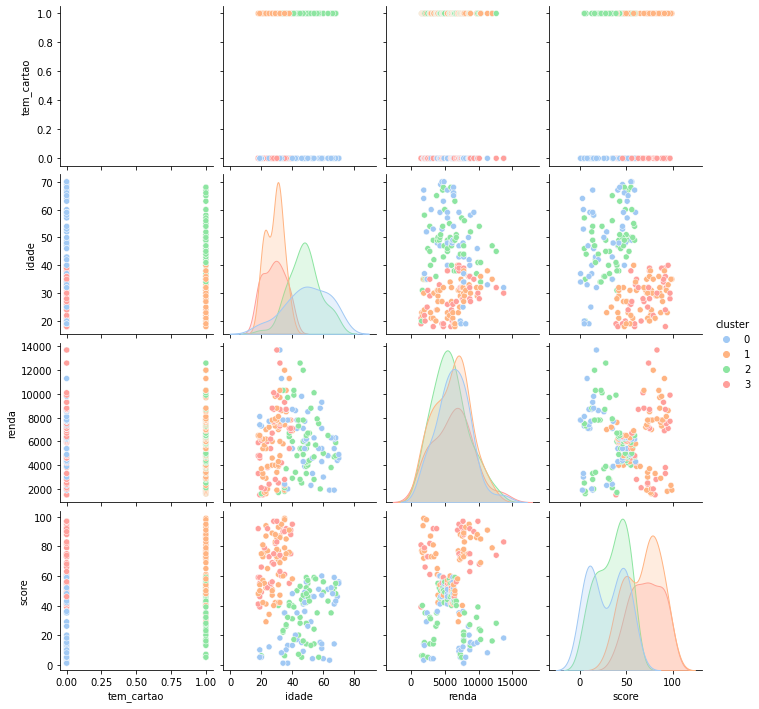

In [25]:
model = KMeans(n_clusters=4, random_state=1)
clusters = model.fit_predict(scaled_segmentation)


original_segmentation = pd.DataFrame(scaler.inverse_transform(scaled_segmentation),columns=segmentation.columns)

original_segmentation['cluster'] = clusters
sns.pairplot(original_segmentation, hue = 'cluster', palette='pastel');

In [26]:
original_segmentation.cluster.value_counts()

2    56
1    56
0    48
3    40
Name: cluster, dtype: int64

**Exemplo - compressão de imagens**

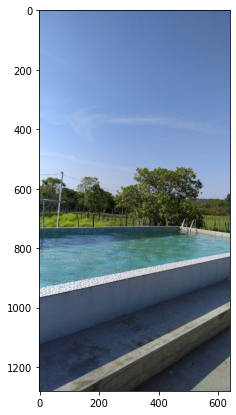

In [29]:
# Importar a imagem
img = plt.imread("KFTZ8669.JPG")
plt.imshow(img)
plt.show()

In [30]:
# dimensão da imagem
img.shape

(1280, 640, 3)

In [31]:
# redimensionar a imagem para termos somente duas dimensões de dados
x, y, z = img.shape
img_2d = img.reshape(x*y, z)
img_2d.shape

(819200, 3)

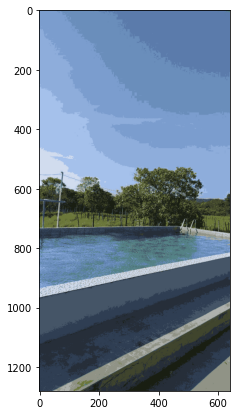

In [32]:
# TODO
# Escolha um número de clusters e use o K-means para realizar os agrupamentos
kmeans_img = KMeans(n_clusters=15, random_state=8)
kmeans_img.fit(img_2d)

cluster_centers = kmeans_img.cluster_centers_
cluster_labels = kmeans_img.labels_
# Plotar a imagem após a compressão
plt.imshow(cluster_centers[cluster_labels].
           reshape(x, y, z).astype(int))
plt.show()

**Exercício 3**
Vamos utilizar o mesmo conjunto de dados utilizado no segundo exercício do K-means para realizar um agrupamento hierárquico aglomerativo. Para esse agrupamento, precisaremos importar o dendograma do Scipy.

O sklearn também possui um módulo para realizar um agrupamento hierárquico aglomerativo, mas é complicado visualizar o dendograma com ele, então vamos ficar com o scipy mesmo.

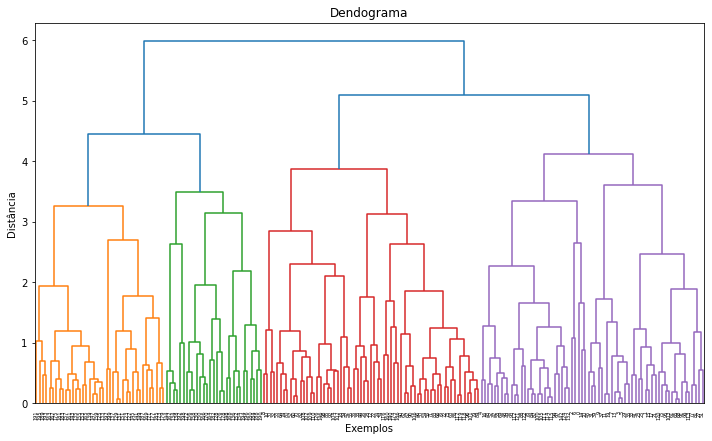

In [33]:
# importar os módulos dendogram e linkage
from scipy.cluster.hierarchy import dendrogram, linkage
h_cluster = linkage(scaled_segmentation, method='complete', metric='euclidean')
plt.title('Dendograma')
plt.xlabel('Exemplos')
plt.ylabel('Distância')
dendrogram(h_cluster)
plt.show()

Vamos testar outras abordagens de agrupamentos e métricas de distância?



E como podemos escolher o número de clusters?

Podemos visualizar o dendograma e observar onde há a maior distância entre os grupos formados.

**Exercício 4**
Vamos utilizar novamente o conjunto do primeiro exercício com o DBSCAN, que vamos importar do sklearn:

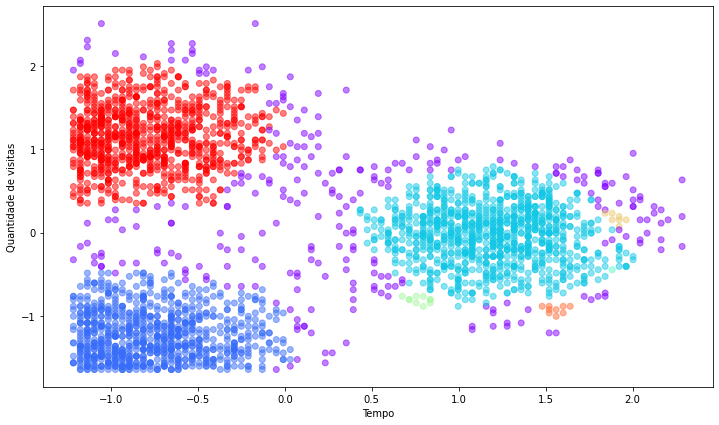

In [35]:
# TODO
# Importar o DBSCAN
from sklearn.cluster import DBSCAN
# TODO
# Escolha um epsilon e um minPts
dbscan = DBSCAN(eps = .1, min_samples = 8)
# salvar os clusters atribuídos para cada exemplo
clusters = dbscan.fit_predict(df)
# plota os clusters encontrados
plt.scatter(df.visitas, df.tempo, c=clusters, alpha=0.5, cmap='rainbow')
plt.xlabel('Tempo')
plt.ylabel('Quantidade de visitas')
plt.show()